# Maximizing Revenue for NYC Yellow Taxi through Payment Type Data Analysis


# Business Problem

In the competitive taxi booking industry, optimizing revenue is crucial for both sustained success and driver satisfaction. We aim to leverage data-driven approaches to enhance income streams for taxi drivers, prioritizing their financial well-being. Our study seeks to explore the potential influence of payment methods on fare pricing by examining the correlation between different payment types and the amount charged for fares.







# Objective

The primary objective of this project is to conduct an A/B test to investigate the association between the total fare and the payment method in Python. Through hypothesis testing and descriptive statistics, we aim to extract valuable insights that can aid taxi drivers in maximizing cash earnings. Specifically, our focus is on determining whether there exists a significant disparity in fares between customers paying with credit cards and those paying with cash.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [5]:
taxi_data = pd.read_csv(r"C:\Users\lakshya sikri\Desktop\yellow_tripdata_2015-01.csv")

In [6]:
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30


In [6]:
taxi_data.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
12748981,1,2015-01-10 19:01:44,2015-01-10 19:05:40,2,1.0,-73.951988,40.786217,1,N,-73.953735,40.775162,1,5.5,0.0,0.5,1.25,0.0,0.3,7.55
12748982,1,2015-01-10 19:01:44,2015-01-10 19:07:26,2,0.8,-73.982742,40.728184,1,N,-73.974976,40.720013,1,6.0,0.0,0.5,2.00,0.0,0.3,8.80
12748983,1,2015-01-10 19:01:44,2015-01-10 19:15:01,1,3.4,-73.979324,40.749550,1,N,-73.969101,40.787800,2,13.5,0.0,0.5,0.00,0.0,0.3,14.30
12748984,1,2015-01-10 19:01:44,2015-01-10 19:17:03,1,1.3,-73.999565,40.738483,1,N,-73.981819,40.737652,1,10.5,0.0,0.5,2.25,0.0,0.3,13.55
12748985,1,2015-01-10 19:01:45,2015-01-10 19:07:33,1,0.7,-73.960350,40.766399,1,N,-73.968643,40.760777,2,5.5,0.0,0.5,0.00,0.0,0.3,6.30


# Explortatory Data Analysis

In [8]:
# rows and columns of the dataset
taxi_data.shape

(12748986, 19)

In [9]:
taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'])
taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data['tpep_dropoff_datetime'])

In [10]:
taxi_data['duration'] = taxi_data['tpep_dropoff_datetime'] - taxi_data['tpep_pickup_datetime']

In [11]:
# converting into minutes
taxi_data['duration'] = taxi_data['duration'].dt.total_seconds()/60

In [12]:
# datatypes of the data
taxi_data.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
pickup_longitude                float64
pickup_latitude                 float64
RateCodeID                        int64
store_and_fwd_flag               object
dropoff_longitude               float64
dropoff_latitude                float64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
duration                        float64
dtype: object

In [13]:
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05,18.050000
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80,19.833333
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80,10.050000
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,1.866667
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30,19.316667


In [14]:
# removing unwanted columns
taxi_data.drop(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
                'store_and_fwd_flag', 'extra',
                'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
                'total_amount', 'RateCodeID', 'pickup_latitude'],
               axis=1, inplace=True)


In [15]:
# filtered data with relevant columns essential for the analysis
taxi_data.head()

,passenger_count,trip_distance,pickup_longitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,duration
0,1,1.59,-73.993896,-73.974785,40.750618,1,12.0,18.050000
1,1,3.30,-74.001648,-73.994415,40.759109,1,14.5,19.833333
2,1,1.80,-73.963341,-73.951820,40.824413,2,9.5,10.050000
3,1,0.50,-74.009087,-74.004326,40.719986,2,3.5,1.866667
4,1,3.00,-73.971176,-74.004181,40.742653,2,15.0,19.316667


In [16]:
# check for missing values
taxi_data.isnull().sum()

passenger_count      0
trip_distance        0
pickup_longitude     0
dropoff_longitude    0
dropoff_latitude     0
payment_type         0
fare_amount          0
duration             0
dtype: int64

In [17]:
# changing the passenger count and payment type data type to integer as they are present in float
taxi_data['passenger_count'] = taxi_data['passenger_count'].astype('int64')
taxi_data['payment_type'] = taxi_data['payment_type'].astype('int64')

In [18]:
# check for the duplicate rows 
taxi_data[taxi_data.duplicated()]

,passenger_count,trip_distance,pickup_longitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,duration
15614,1,2.1,0.0,0.0,0.0,2,9.0,7.700000
34822,1,0.0,0.0,0.0,0.0,2,2.5,0.000000
44738,1,0.0,0.0,0.0,0.0,2,2.5,0.000000
46146,1,0.8,0.0,0.0,0.0,2,5.0,4.366667
51907,1,0.6,0.0,0.0,0.0,1,4.0,2.216667
...,...,...,...,...,...,...,...,...
12748427,1,1.1,0.0,0.0,0.0,2,7.0,7.566667
12748458,1,1.1,0.0,0.0,0.0,2,6.0,5.600000
12748507,1,2.0,0.0,0.0,0.0,1,9.0,10.033333
12748789,1,1.2,0.0,0.0,0.0,2,7.5,8.766667


In [19]:
# removing duplicate rows as they will not contribute in analysis 
taxi_data.drop_duplicates(inplace = True)

In [20]:
taxi_data.shape

(12684941, 8)

In [21]:
# passenger count distribution
taxi_data['passenger_count'].value_counts(normalize = True)

passenger_count
1    7.043336e-01
2    1.427740e-01
5    5.496139e-02
3    4.163717e-02
6    3.581743e-02
4    1.995650e-02
0    5.175428e-04
9    8.671700e-07
8    7.883363e-07
7    7.095027e-07
Name: proportion, dtype: float64

In [22]:
# payment type distribution
taxi_data['payment_type'].value_counts()

payment_type
1    7842156
2    4792387
3      38465
4      11931
5          2
Name: count, dtype: int64

To narrow down our analysis to focus exclusively on payment methods 'card' and 'cash,' represented by 1 and 2 in the dataset, we'll filter the data to exclude all other payment types.

Furthermore, after assessing the distribution of passenger counts, we've observed that trips with more than 5 passengers are uncommon. Additionally, trips with 0 passengers are implausible since we anticipate at least one passenger to cover the fare amount. Consequently, we'll filter the passenger count to encompass only values between 1 and 5.

In [23]:
# filtering for payment type 1 and 2
taxi_data = taxi_data[taxi_data['payment_type']<3]

# filtering for passenger count from 1 to 2
taxi_data = taxi_data[(taxi_data['passenger_count']>0)&(taxi_data['passenger_count']<6)]

In [24]:
# replacing the payment type encoded value 1 and 2 to Card and Cash
taxi_data['payment_type'].replace([1,2],['Card','Cash'], inplace = True)

In [25]:
# descriptive statistics for data
taxi_data.describe()

,passenger_count,trip_distance,pickup_longitude,dropoff_longitude,dropoff_latitude,fare_amount,duration
count,1.217390e+07,1.217390e+07,1.217390e+07,1.217390e+07,1.217390e+07,1.217390e+07,1.217390e+07
mean,1.525940e+00,1.370635e+01,-7.291271e+01,-7.296360e+01,4.019491e+01,1.193134e+01,1.424134e+01
std,1.070982e+00,1.005245e+04,8.799682e+00,8.599348e+00,4.734315e+00,1.025174e+01,6.643851e+02
min,1.000000e+00,0.000000e+00,-1.219258e+02,-7.401667e+02,-9.029157e+00,-4.500000e+02,-1.211017e+03
25%,1.000000e+00,1.000000e+00,-7.399174e+01,-7.399124e+01,4.073471e+01,6.500000e+00,6.133333e+00
50%,1.000000e+00,1.690000e+00,-7.398171e+01,-7.397990e+01,4.075380e+01,9.000000e+00,9.983333e+00
75%,2.000000e+00,3.010000e+00,-7.396697e+01,-7.396288e+01,4.076891e+01,1.350000e+01,1.583333e+01
max,5.000000e+00,1.542000e+07,7.866265e+01,8.527402e+01,4.595333e+02,4.008000e+03,5.485556e+05


In [30]:
# filtering the records for only positive values
taxi_data = taxi_data[taxi_data['fare_amount']>0]
taxi_data = taxi_data[taxi_data['trip_distance']>0]
taxi_data = taxi_data[taxi_data['duration']>0]

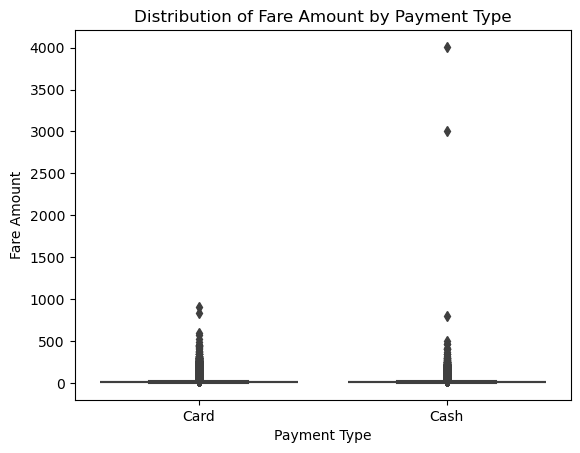

In [29]:
sns.boxplot(data=taxi_data, x="payment_type", y="fare_amount")
plt.xlabel("Payment Type")
plt.ylabel("Fare Amount")
plt.title("Distribution of Fare Amount by Payment Type")
plt.show()


In [31]:
# removing outliers using interquartile range for the numerical variables
for col in ['trip_distance','fare_amount','duration']:
    Q1 = taxi_data[col].quantile(0.25)
    Q3 = taxi_data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers
    taxi_data = taxi_data[(taxi_data[col] >= lower_bound) & (taxi_data[col] <= upper_bound)]



We aim to examine how payment type correlates with passenger behavior regarding trip distance and fare amount. Specifically, we want to explore whether there are differences in the distribution of payment types concerning various fare amounts or trip distances.

To address this, we'll create histograms to depict the distribution of passenger counts for both card and cash payments. This analysis will shed light on the fare amount ranges associated with different payment methods, providing valuable insights for stakeholders.

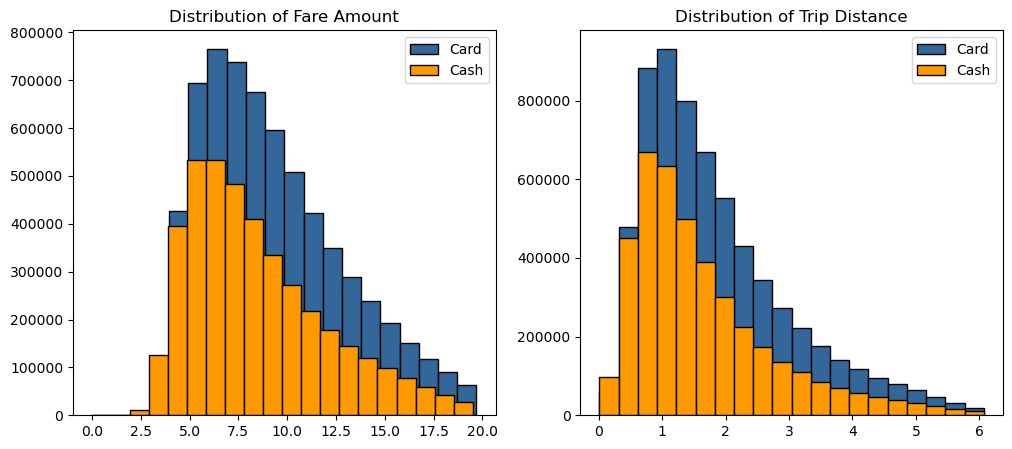

,Fare Amount Mean,Fare Amount Std,Trip Distance Mean,Trip Distance Std
payment_type,,,,
Card,9.158003,3.678770,1.861977,1.156223
Cash,8.454408,3.621648,1.651953,1.116932


In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Distribution of Fare Amount')
plt.hist(taxi_data[taxi_data['payment_type'] == 'Card']['fare_amount'], histtype='barstacked', bins=20, edgecolor='k', color='#336699', label='Card')
plt.hist(taxi_data[taxi_data['payment_type'] == 'Cash']['fare_amount'], histtype='barstacked', bins=20, edgecolor='k', color='#FF9900', label='Cash')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Distribution of Trip Distance')
plt.hist(taxi_data[taxi_data['payment_type'] == 'Card']['trip_distance'], histtype='barstacked', bins=20, edgecolor='k', color='#336699', label='Card')
plt.hist(taxi_data[taxi_data['payment_type'] == 'Cash']['trip_distance'], histtype='barstacked', bins=20, edgecolor='k', color='#FF9900', label='Cash')
plt.legend()

plt.show()

# calculating the mean and standard deviation group by on payment type
statistics = taxi_data.groupby('payment_type').agg({'fare_amount': ['mean', 'std'], 'trip_distance': ['mean', 'std']})
statistics.columns = ['Fare Amount Mean', 'Fare Amount Std', 'Trip Distance Mean', 'Trip Distance Std']
statistics


To explore passengers' preferences regarding their payment methods, we'll evaluate the proportion of the two payment types. We've chosen to represent this visually using a pie chart, as it offers a clear and intuitive understanding of the distribution between the two payment methods favored by passengers.

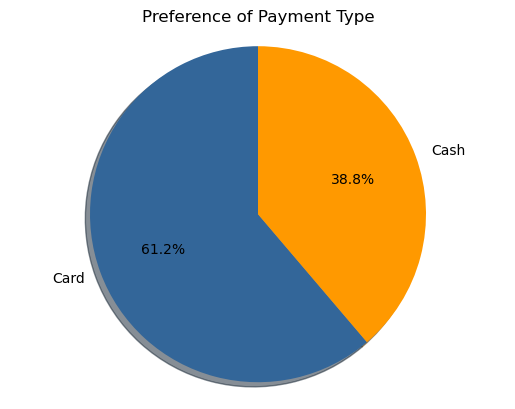

In [33]:
import matplotlib.pyplot as plt

plt.title('Preference of Payment Type')
plt.pie(taxi_data['payment_type'].value_counts(normalize=True), labels=taxi_data['payment_type'].value_counts().index,
       startangle=90, shadow=True, autopct='%1.1f%%', colors=['#336699', '#FF9900'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


We're aiming to analyze how payment types correlate with passenger count, exploring whether preferences change based on the number of passengers in the cab. To facilitate this analysis, we've chosen to use a stacked bar plot. This visualization method is advantageous for comparing the percentage distribution of each passenger count according to the chosen payment method. By employing this graphical representation, we can discern potential variations in payment preferences across different passenger counts.

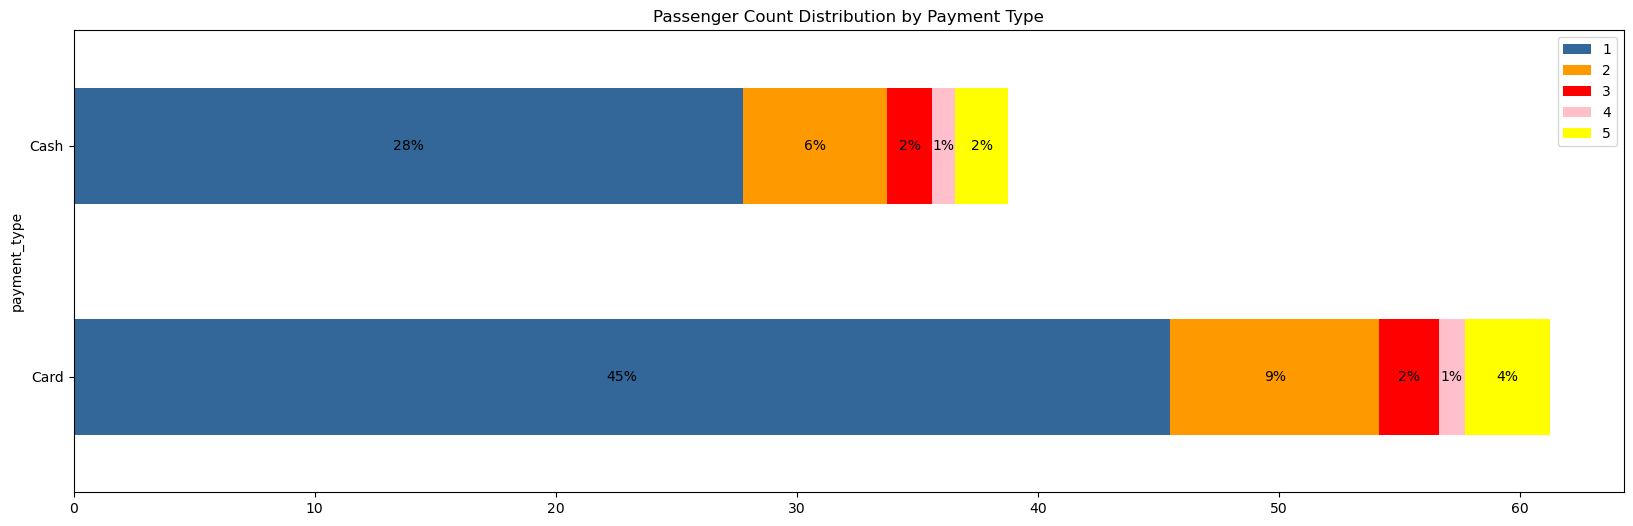

In [43]:
# Assuming you have already defined your taxi_data DataFrame

# Calculating the total passenger count distribution based on the different payment type
passenger_count = taxi_data.groupby(['payment_type','passenger_count'])[['passenger_count']].count()

# Renaming the passenger_count to count to reset the index
passenger_count.rename(columns={'passenger_count': 'count'}, inplace=True)
passenger_count.reset_index(inplace=True)

# Calculating the percentage of each passenger count
passenger_count['perc'] = (passenger_count['count'] / passenger_count['count'].sum()) * 100

# Creating a new empty dataframe to store the distribution of each payment type (useful for visualization)
df = pd.DataFrame(columns=['payment_type', 1, 2, 3, 4, 5])
df['payment_type'] = ['Card', 'Cash']
df.iloc[0, 1:] = passenger_count.iloc[:5, -1]
df.iloc[1, 1:] = passenger_count.iloc[5:, -1]

fig, ax = plt.subplots(figsize=(20, 6))
df.plot(x='payment_type', kind='barh', stacked=True, title='Passenger Count Distribution by Payment Type', ax=ax, color=['#336699','#FF9900' , 'red', 'pink', 'yellow'])

# Add percentage text
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2,
            y + height / 2,
            '{:.0f}%'.format(width),
            horizontalalignment='center',
            verticalalignment='center',
            color='black')  # Change the color of the percentage text

plt.show()

# Hypothesis Testing

To assess whether the fare amount distributions for each payment type approximate a normal distribution, we'll utilize Quantile-Quantile (QQ) plots. These plots compare the quantiles of our data to the quantiles of a theoretical normal distribution. If the data closely adheres to the diagonal line in the QQ plot, it suggests that the data follows a normal distribution. Thus, by examining the alignment of data points with this line, we can evaluate the normality assumption of our fare amount distributions.

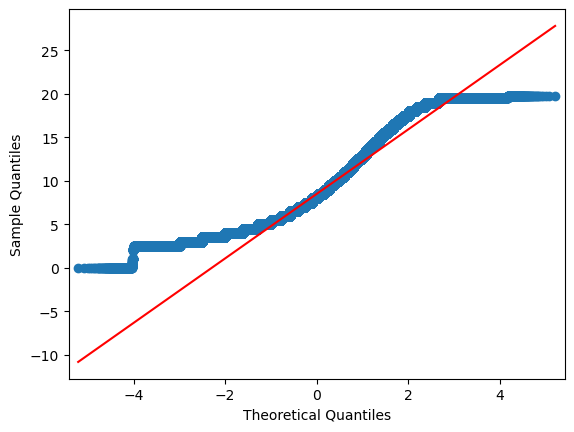

In [35]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming you have already imported necessary libraries and have your taxi_data DataFrame

# Create the Q-Q plot with a 45-degree line added and specify the color
fig = sm.qqplot(taxi_data['fare_amount'], line='q', color='green', ax=plt.gca())
plt.show()


In the context of analyzing NYC Yellow Taxi Trip Records, where we often lack knowledge about the population standard deviation and deal with potentially large datasets, the T-test emerges as a versatile and robust statistical method for comparing means between two groups, such as fare amounts based on payment type.

The T-test is well-suited for scenarios where the sample size may vary and the population standard deviation is unknown. It offers a reliable approach for hypothesis testing, accommodating the uncertainty inherent in estimating population parameters from sample data.

The null hypothesis posits that there is no discrepancy in the average fare between customers who utilize credit cards and those who prefer cash. Conversely, the alternative hypothesis suggests that there exists a disparity in the average fare between these two groups.







In [36]:
# sample 1
credit_card = taxi_data[taxi_data['payment_type'] == 'Card']['fare_amount']

# sample 2
cash = taxi_data[taxi_data['payment_type'] == 'Cash']['fare_amount']

# performing t test on both the different sample
t_stat, p_value = stats.ttest_ind(a=credit_card, b=cash, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# comparing the p value with the significance of 5% or 0.05
if p_value < 0.05:
    print("\nReject the null hypothesis")
else:
    print("\nAccept the null hypothesis")

T-statistic: 304.5135436847422, P-value: 0.0

Reject the null hypothesis


# Regression Analysis

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# independent variable
X = taxi_data[['duration']]

# dependent variable
y = taxi_data['fare_amount']

# initializing and fitting Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X, y)
prediction = reg_model.predict(X)

# model evaluation
r2 = r2_score(y, prediction) * 100
mse = mean_squared_error(y, prediction)
print('Accuracy (R2 Score):', round(r2, 2), '%')
print('Mean Squared Error:', round(mse, 2))


Accuracy (R2 Score): 85.8 %
Mean Squared Error: 1.92


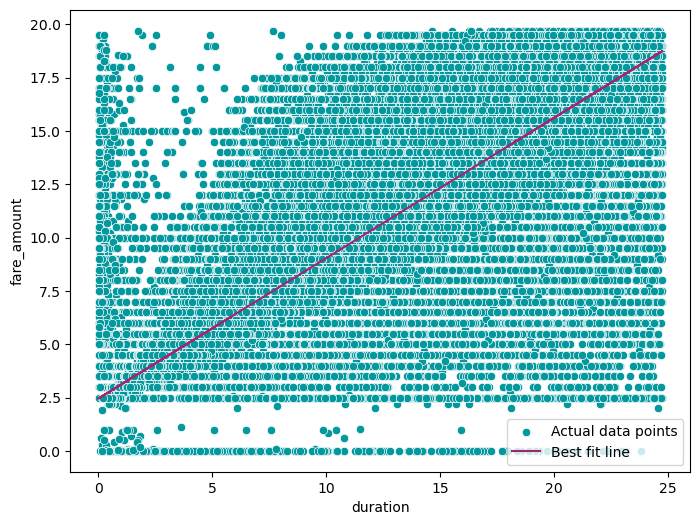

In [42]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = taxi_data['duration'],y = taxi_data['fare_amount'], color = '#03989E', label = 'Actual data points')
plt.plot(taxi_data['duration'], prediction, color = '#A62372', label = 'Best fit line')
plt.legend()
plt.show()